In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Parch"], axis=1, inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<AxesSubplot:>

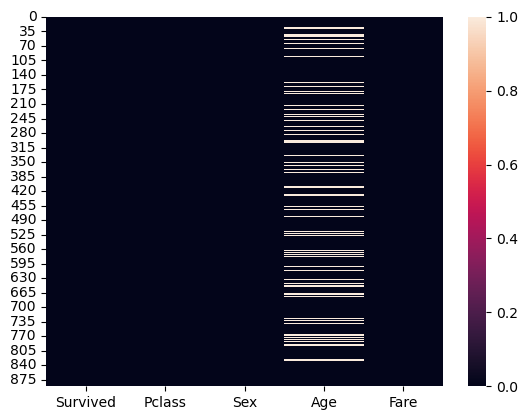

In [7]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

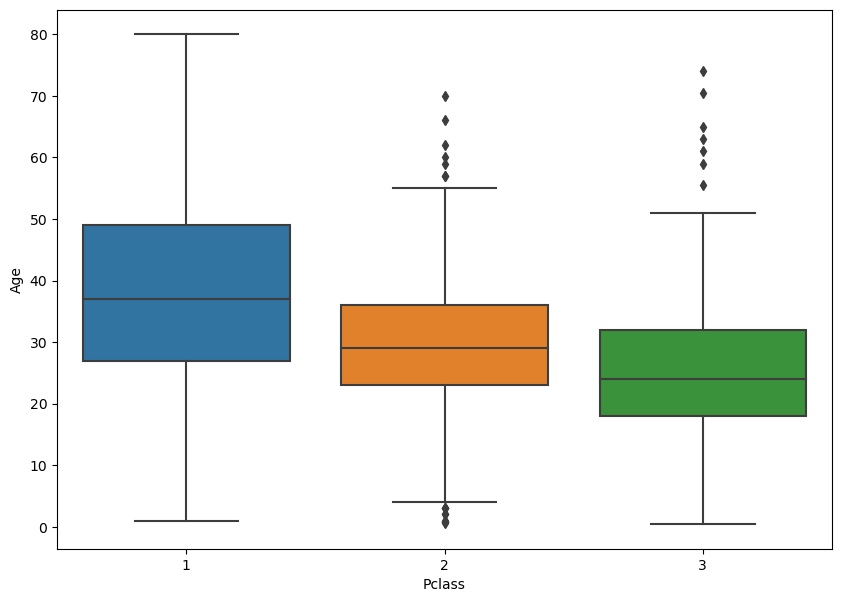

In [8]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "Pclass", y="Age", data=df)

In [10]:
def impute_age(cols):
    pclass = cols[0]
    age = cols[1] 
    if pd.isnull(age):
        if pclass==1:
            return 38 

        elif pclass == 2:
            return 29 
        elif pclass==3:
            return 24
    else: 
        return age 

In [11]:
df["Age"] = df[["Pclass", "Age"]].apply(impute_age, axis=1)

In [12]:
df.head() 

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<AxesSubplot:>

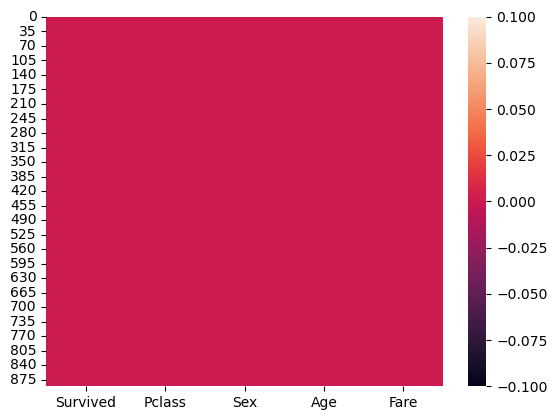

In [13]:
sns.heatmap(df.isnull())

In [16]:
sex = pd.get_dummies(df["Sex"], drop_first=True)
sex 

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [17]:
df = pd.concat([df, sex], axis=1)

In [18]:
df

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,24.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [23]:
X = df.drop(["Survived", "Sex"], axis=1)
y = df["Survived"]

In [24]:
X

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,24.0,23.4500,0
889,1,26.0,30.0000,1


In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [27]:
model.fit(X_train, y_train) 

GaussianNB()

In [28]:
model.score(X_test, y_test) 

0.7877094972067039

In [32]:
predictions = model.predict(X_test)

In [36]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       107
           1       0.75      0.71      0.73        72

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



<AxesSubplot:>

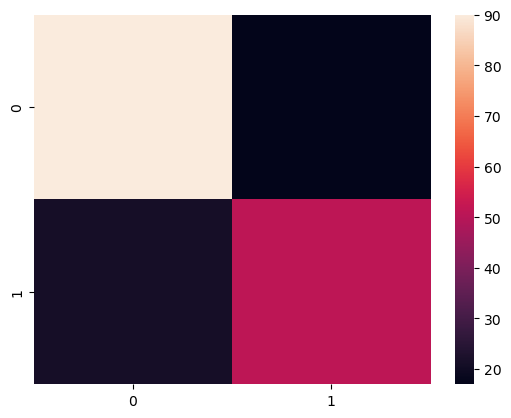

In [34]:
sns.heatmap(confusion_matrix(y_test, predictions))

In [35]:
print(confusion_matrix(y_test, predictions))

[[90 17]
 [21 51]]


In [37]:
print(accuracy_score(y_test, predictions))

0.7877094972067039
